In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("used_cars_data.csv")

In [3]:
dataset

,Unnamed: 0,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1
...,...,...,...,...,...,...,...,...,...,...
787,787,Volkswagen,Golf,13990,Edition 1.6 TDI 110CV BMT,2016,84040,Diésel,Manual,Gavá
788,788,Kia,Sportage,24990,1.6 GDi 97kW (132CV) Basic 4x2,2018,65872,Gasolina,Manual,Viladecans
789,789,Abarth,500,17990,1.4 16v T-Jet 595 118kW (160CV) Pista E6,2019,28830,Gasolina,Manual,Mataró
790,790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [4]:
y=dataset['price (eur)']

In [5]:
y

0       8990
1       9990
2      13490
3      24990
4      10460
       ...  
787    13990
788    24990
789    17990
790    14990
791    14390
Name: price (eur), Length: 792, dtype: int64

In [6]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'price (eur)', 'engine', 'year',
       'mileage (kms)', 'fuel', 'gearbox', 'location'],
      dtype='object')

In [7]:
x=dataset[['gearbox','fuel','mileage (kms)','year']]

In [8]:
x

,gearbox,fuel,mileage (kms),year
0,Manual,Gasolina,67000,2016
1,Manual,Diésel,104868,2014
2,Automatica,Diésel,137566,2011
3,Manual,Gasolina,44495,2018
4,Manual,Gasolina,69800,2016
...,...,...,...,...
787,Manual,Diésel,84040,2016
788,Manual,Gasolina,65872,2018
789,Manual,Gasolina,28830,2019
790,Automatica,Diésel,162895,2014


C:\Users\91998\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

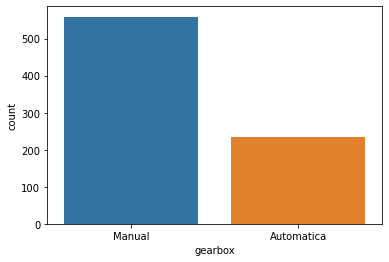

In [9]:
sns.countplot(x['gearbox'])

C:\Users\91998\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='count'>

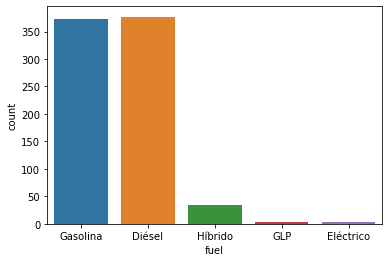

In [10]:
sns.countplot(x['fuel'])

In [11]:
x['gearbox'].unique()

array(['Manual', 'Automatica'], dtype=object)

In [12]:
x=x.replace({'Manual':0, 'Automatica':1})

In [13]:
x['fuel'].unique()

array(['Gasolina', 'Diésel', 'Híbrido', 'GLP', 'Eléctrico'], dtype=object)

In [14]:
x=x.replace({'Gasolina':0, 'Diésel':1, 'Híbrido':2, 'GLP':3, 'Eléctrico':4})

In [15]:
x

,gearbox,fuel,mileage (kms),year
0,0,0,67000,2016
1,0,1,104868,2014
2,1,1,137566,2011
3,0,0,44495,2018
4,0,0,69800,2016
...,...,...,...,...
787,0,1,84040,2016
788,0,0,65872,2018
789,0,0,28830,2019
790,1,1,162895,2014


In [16]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_predict=model.predict(X_test)

In [27]:
y_predict

array([ 8240.77489786, 14411.92745273, 22146.66959784, 17389.88918055,
       22854.29625158, 15539.72820055, 13362.80519805, 15523.41563809,
        9948.34426004, 11937.00980727, 13262.11139235, 15035.1694396 ,
       13357.70485858, 25585.88547204, 15396.46134761, 14852.89850017,
       24531.63204128, 11485.67361901,  7740.50102221, 12607.44067171,
       19617.92899032, 10623.55277651, 15534.72239216, 15370.26051477,
       11598.66920764, 18547.87377034, 21790.25733912, 21481.37737566,
       23348.45279879, 13027.54763972, 15307.2818946 , 18575.01315023,
       19414.0476567 , 15718.43456679, 12133.88095337, 15385.64797917,
       25192.64060801, 19730.93283655, 11611.89125468, 16234.3240632 ,
       19079.45198842, 14006.84756986, 13453.81226817,  8362.77679555,
       13611.29681591, 22951.6885196 , 15044.71648608, 20946.25954211,
        8682.76619334, 22371.13809242, 12234.61385327, 14995.31827093,
       14387.98999197, 12964.02423958, 14180.83997854, 18512.37056256,
      